# Twitter Scraper using Sns Library

In [ ]:
#Importing Libraries

import pandas as pd 
import numpy as np 
import snscrape.modules.twitter as sntwitter 
import datetime 
from tqdm.notebook import tqdm_notebook 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set_theme(style="whitegrid") 

In [ ]:
#Taking User Input 

text = input('Enter query text to be matched (or leave it blank by pressing enter)') 
username = input('Enter specific username(s) from a twitter account without @ (or leave it blank by pressing enter): ') 
since = input('Enter startdate in this format yyyy-mm-dd (or leave it blank by pressing enter): ') 
until = input('Enter enddate in this format yyyy-mm-dd (or leave it blank by pressing enter): ') 
count = int(input('Enter max number of tweets or enter -1 to retrieve all possible tweets: ')) 
retweet = input('Exclude Retweets? (y/n): ') 
replies = input('Exclude Replies? (y/n): ')

In [ ]:
# Making Twitter Search Query Builder and File Naming Function

def search(text, username, since, until, retweet, replies):
    global filename
    
    q = text
    
    if username != '':
        q += f" from:{username}"
        
    if until == '':
        until = datetime.datetime.strftime(datetime.date.today(), '%Y-%m-%d')
    
    q += f" until:{until}"
    
    if since == '':
        since = datetime.datetime.strftime(
            datetime.datetime.strptime(until, '%Y-%m-%d') -
            datetime.timedelta(days=7), '%Y-%m-%d'
        )
    
    q += f" since:{since}"
    
    if retweet == 'y':
        q += f" exclude:retweets"
    
    if replies == 'y':
        q += f" exclude:replies"
    
    if username != '' and text != '':
        filename = f"{since}_{until}_{username}_{text}.csv"
    elif username != "":
        filename = f"{since}_{until}_{username}.csv"
    else:
        filename = f"{since}_{until}_{text}.csv"
    
    print(filename)
    return q

In [ ]:
#Twitter Data Scraping and DataFrame Creation

q = search(text, username, since, until, retweet, replies)

# Creating list to append tweet data
tweets_list1 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
if count == 2000:
    for i, tweet in enumerate(tqdm_notebook(sntwitter.TwitterSearchScraper(q).get_items())):
        tweets_list1.append([
            tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.lang,
            tweet.hashtags, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.media
        ])
else:
    with tqdm_notebook(total=count) as pbar:
        for i, tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()):
            if i >= count:  # number of tweets you want to scrape
                break
            tweets_list1.append([
                tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.lang,
                tweet.hashtags, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.media
            ])
            pbar.update(1)

# Creating a dataframe from the tweets list above
tweets_df1 = pd.DataFrame(
    tweets_list1,
    columns=['DateTime', 'TweetId', 'Text', 'Username', 'Language', 'Hashtags',
             'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'Media']
)

In [ ]:
#Downloading the scraped reviews

tweets_df1.to_csv('tweets_data.csv', index=False)

# Time Series Analysis on Elon Musk's Twitter Data


## 1. Importing Necessary Files 

In [1]:
#Importing libraries 

import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing scraped twitter reviews 

tweets = pd.read_csv("D:/desktop/Daily Routine/Twitter Analytics/tweets_data.csv")
tweets.head()

,DateTime,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media
0,2023-05-29 19:34:31+00:00,1663267596689350656,"Also, you can now change video playback speed",elonmusk,en,NaN,13024,8817,105705,979,NaN
1,2023-05-29 18:47:15+00:00,1663255699365691399,Scrolling through tweets while watching mini v...,elonmusk,en,NaN,7026,6584,75645,533,NaN
2,2023-05-29 18:01:08+00:00,1663244096503160833,🇺🇸 For those who died for freedom 🇺🇸,elonmusk,en,NaN,14155,35720,357244,1887,NaN
3,2023-05-29 16:07:29+00:00,1663215495472902146,What will AI be like in 2040? https://t.co/sDH...,elonmusk,en,NaN,12790,19497,218794,1284,[Photo(previewUrl='https://pbs.twimg.com/media...
4,2023-05-29 02:51:07+00:00,1663015083738374146,"Incompetence, in the limit, is indistinguishab...",elonmusk,en,NaN,16422,25852,196607,3486,NaN


## 2. Data Preprocessing

In [3]:
#Getting the data information 

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DateTime      3290 non-null   object
 1   TweetId       3290 non-null   int64 
 2   Text          3290 non-null   object
 3   Username      3290 non-null   object
 4   Language      3290 non-null   object
 5   Hashtags      13 non-null     object
 6   ReplyCount    3290 non-null   int64 
 7   RetweetCount  3290 non-null   int64 
 8   LikeCount     3290 non-null   int64 
 9   QuoteCount    3290 non-null   int64 
 10  Media         895 non-null    object
dtypes: int64(5), object(6)
memory usage: 282.9+ KB


In [4]:
#Adding more columns for time-series analysis

tweets['DateTime'] = pd.to_datetime(tweets['DateTime'])  # Convert to datetime if not already
tweets['Year'] = tweets['DateTime'].dt.year
tweets['Month'] = tweets['DateTime'].dt.month
tweets['MonthName'] = tweets['DateTime'].dt.month_name()
tweets['MonthDay'] = tweets['DateTime'].dt.day
tweets['DayName'] = tweets['DateTime'].dt.day_name()
tweets['Week'] = tweets['DateTime'].dt.isocalendar().week
tweets['Hour'] = tweets['DateTime'].dt.hour
tweets.head()

,DateTime,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,Year,Month,MonthName,MonthDay,DayName,Week,Hour
0,2023-05-29 19:34:31+00:00,1663267596689350656,"Also, you can now change video playback speed",elonmusk,en,NaN,13024,8817,105705,979,NaN,2023,5,May,29,Monday,22,19
1,2023-05-29 18:47:15+00:00,1663255699365691399,Scrolling through tweets while watching mini v...,elonmusk,en,NaN,7026,6584,75645,533,NaN,2023,5,May,29,Monday,22,18
2,2023-05-29 18:01:08+00:00,1663244096503160833,🇺🇸 For those who died for freedom 🇺🇸,elonmusk,en,NaN,14155,35720,357244,1887,NaN,2023,5,May,29,Monday,22,18
3,2023-05-29 16:07:29+00:00,1663215495472902146,What will AI be like in 2040? https://t.co/sDH...,elonmusk,en,NaN,12790,19497,218794,1284,[Photo(previewUrl='https://pbs.twimg.com/media...,2023,5,May,29,Monday,22,16
4,2023-05-29 02:51:07+00:00,1663015083738374146,"Incompetence, in the limit, is indistinguishab...",elonmusk,en,NaN,16422,25852,196607,3486,NaN,2023,5,May,29,Monday,22,2


In [5]:
#Splitting timestamp column into separate date and time columns

tweets['Date'] = tweets['DateTime'].dt.date
tweets['Time'] = tweets['DateTime'].dt.time

tweets.head()

,DateTime,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,Year,Month,MonthName,MonthDay,DayName,Week,Hour,Date,Time
0,2023-05-29 19:34:31+00:00,1663267596689350656,"Also, you can now change video playback speed",elonmusk,en,NaN,13024,8817,105705,979,NaN,2023,5,May,29,Monday,22,19,2023-05-29,19:34:31
1,2023-05-29 18:47:15+00:00,1663255699365691399,Scrolling through tweets while watching mini v...,elonmusk,en,NaN,7026,6584,75645,533,NaN,2023,5,May,29,Monday,22,18,2023-05-29,18:47:15
2,2023-05-29 18:01:08+00:00,1663244096503160833,🇺🇸 For those who died for freedom 🇺🇸,elonmusk,en,NaN,14155,35720,357244,1887,NaN,2023,5,May,29,Monday,22,18,2023-05-29,18:01:08
3,2023-05-29 16:07:29+00:00,1663215495472902146,What will AI be like in 2040? https://t.co/sDH...,elonmusk,en,NaN,12790,19497,218794,1284,[Photo(previewUrl='https://pbs.twimg.com/media...,2023,5,May,29,Monday,22,16,2023-05-29,16:07:29
4,2023-05-29 02:51:07+00:00,1663015083738374146,"Incompetence, in the limit, is indistinguishab...",elonmusk,en,NaN,16422,25852,196607,3486,NaN,2023,5,May,29,Monday,22,2,2023-05-29,02:51:07


In [6]:
# Dropping unnecessay columns
# tweets.drop('DateTime',axis=1,inplace=True)
# tweets

columns_to_drop = ['TweetId', 'Username', 'Language', 'Hashtags', 'Media']
df = tweets.drop(columns=columns_to_drop)
df.head()

,DateTime,Text,ReplyCount,RetweetCount,LikeCount,QuoteCount,Year,Month,MonthName,MonthDay,DayName,Week,Hour,Date,Time
0,2023-05-29 19:34:31+00:00,"Also, you can now change video playback speed",13024,8817,105705,979,2023,5,May,29,Monday,22,19,2023-05-29,19:34:31
1,2023-05-29 18:47:15+00:00,Scrolling through tweets while watching mini v...,7026,6584,75645,533,2023,5,May,29,Monday,22,18,2023-05-29,18:47:15
2,2023-05-29 18:01:08+00:00,🇺🇸 For those who died for freedom 🇺🇸,14155,35720,357244,1887,2023,5,May,29,Monday,22,18,2023-05-29,18:01:08
3,2023-05-29 16:07:29+00:00,What will AI be like in 2040? https://t.co/sDH...,12790,19497,218794,1284,2023,5,May,29,Monday,22,16,2023-05-29,16:07:29
4,2023-05-29 02:51:07+00:00,"Incompetence, in the limit, is indistinguishab...",16422,25852,196607,3486,2023,5,May,29,Monday,22,2,2023-05-29,02:51:07


In [7]:
# Define a mapping dictionary for month abbreviations
month_mapping = {
    'January': 'Jan',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Apr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Aug',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dec'
}

# Replace the values in the 'MonthName' column with abbreviated month names
df['MonthName'] = df['MonthName'].replace(month_mapping)


In [8]:
#Checking the columns 
display(df.columns)

#Describing the data
display(df.describe())

#Saving the csv for tableau
df.to_csv("D:/downloads/elun.csv", index=False)

Index(['DateTime', 'Text', 'ReplyCount', 'RetweetCount', 'LikeCount',
       'QuoteCount', 'Year', 'Month', 'MonthName', 'MonthDay', 'DayName',
       'Week', 'Hour', 'Date', 'Time'],
      dtype='object')

,ReplyCount,RetweetCount,LikeCount,QuoteCount,Year,Month,MonthDay,Week,Hour
count,3290.000000,3290.000000,3.290000e+03,3290.000000,3290.000000,3290.000000,3290.000000,3290.0,3290.000000
mean,10601.399088,17394.622492,1.789060e+05,2851.424316,2020.401216,6.278116,15.878116,25.448632,12.223708
std,18566.916519,28845.214010,2.442242e+05,7700.747874,1.936385,3.497666,8.858987,15.276511,7.756898
min,73.000000,195.000000,2.053000e+03,12.000000,2017.000000,1.000000,1.000000,1.0,0.000000
25%,1245.250000,3171.500000,3.757400e+04,332.000000,2019.000000,3.000000,8.000000,13.0,5.000000
50%,4949.500000,8523.500000,1.036995e+05,949.000000,2021.000000,6.000000,16.000000,23.0,14.000000
75%,12270.500000,20373.000000,2.322712e+05,2555.000000,2022.000000,9.750000,24.000000,39.0,19.000000
max,385312.000000,656109.000000,4.636952e+06,180076.000000,2023.000000,12.000000,31.000000,53.0,23.000000


In [9]:
df['MonthName'].values

array(['May', 'May', 'May', ..., 'Jan', 'Jan', 'Jan'], dtype=object)

Description of each column 

ReplyCount: It represents the number of replies or responses a particular tweet has received. It indicates the level of engagement and conversation generated by the tweet, as it counts the direct replies to that specific tweet.

RetweetCount: It denotes the number of times a tweet has been retweeted, meaning it has been shared by other users on their own Twitter accounts. It reflects the reach and influence of the tweet, as retweets help to amplify its visibility and potential audience.

LikeCount: It signifies the number of times a tweet has been liked or favorited by other Twitter users. It indicates the level of positive reception and approval the tweet has received, as users show their appreciation or agreement by liking the tweet.

QuoteCount: It represents the number of times a tweet has been quoted by other users. When a tweet is quoted, it is embedded in a new tweet with additional commentary or context. QuoteCount measures the instances where users found the tweet noteworthy or important enough to include it in their own tweets.

Year: It indicates the year in which the tweet was posted. This column provides a temporal reference for analyzing trends, patterns, and changes in tweet activity over different years.

Month: It represents the month (numerical value) in which the tweet was posted. It helps in examining monthly variations, comparing tweet activity, engagement metrics, or trends between different months.

MonthDay: It signifies the day of the month when the tweet was posted. This column allows for the analysis of daily patterns or variations in tweet activity and engagement metrics.

Week: It represents the week number of the year when the tweet was posted. It enables the analysis of weekly trends, comparing tweet activity, or engagement metrics across different weeks of the year.

Hour: It denotes the hour of the day when the tweet was posted. This column facilitates the analysis of hourly patterns, identifying peak activity periods or variations in tweet engagement throughout the day.

## 3. Time Series Analysis 

### 1. Trend Analysis

This shows the trend in metrics like reply count, retweet count, like count, and quote count over time

C:\Users\Karl Jade C. Silva\AppData\Local\Temp\ipykernel_9932\2630248238.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='ReplyCount', data=df, ci=None, label='ReplyCount')
C:\Users\Karl Jade C. Silva\AppData\Local\Temp\ipykernel_9932\2630248238.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='RetweetCount', data=df, ci=None, label='RetweetCount')
C:\Users\Karl Jade C. Silva\AppData\Local\Temp\ipykernel_9932\2630248238.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='QuoteCount', data=df, ci=None, label='QuoteCount')


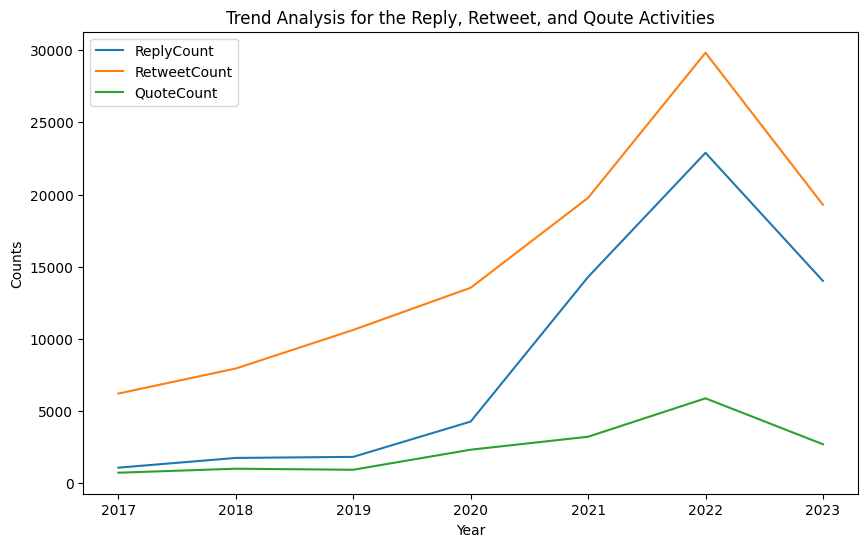

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x='Year', y='ReplyCount', data=df, ci=None, label='ReplyCount')
sns.lineplot(x='Year', y='RetweetCount', data=df, ci=None, label='RetweetCount')
# 
sns.lineplot(x='Year', y='QuoteCount', data=df, ci=None, label='QuoteCount')

ax.set_xlabel('Year')
ax.set_ylabel('Counts')
ax.set_title('Trend Analysis for the Reply, Retweet, and Qoute Activities')

plt.legend()
plt.show()


C:\Users\Karl Jade C. Silva\AppData\Local\Temp\ipykernel_9932\497766100.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='LikeCount', data=df, ci=None, label='LikeCount')


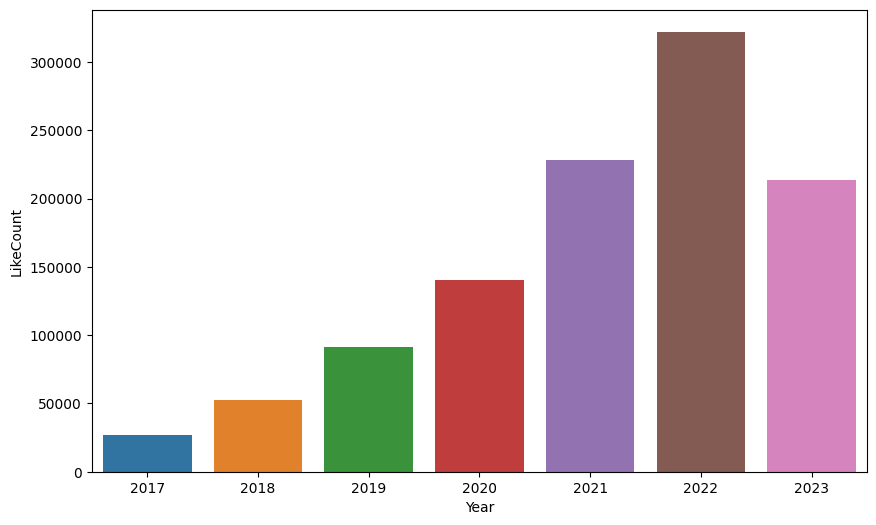

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='Year', y='LikeCount', data=df, ci=None, label='LikeCount')
plt.show()

### 2. Seasonality Analysis 

This shows the variation in tweet activity, such as the number of replies, retweets, likes, and quotes, across different months, days of the month, weeks, or hours

C:\Users\Karl Jade C. Silva\AppData\Local\Temp\ipykernel_9932\2916271855.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='MonthName', y='ReplyCount', data=df, label='Reply Count', ci=None)
C:\Users\Karl Jade C. Silva\AppData\Local\Temp\ipykernel_9932\2916271855.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='MonthName', y='RetweetCount', data=df, label='Retweet Count', ci=None)
C:\Users\Karl Jade C. Silva\AppData\Local\Temp\ipykernel_9932\2916271855.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='MonthName', y='QuoteCount', data=df, label='Quote Count', ci=None)


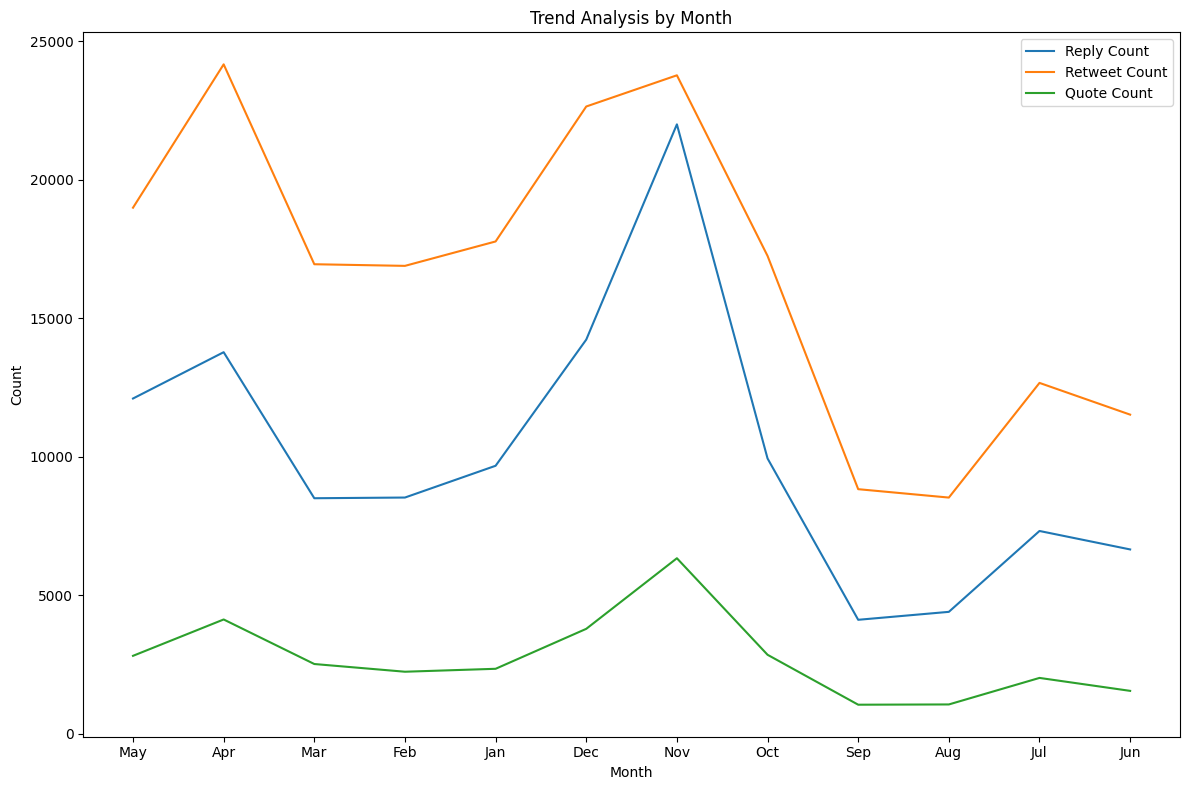

In [12]:
plt.figure(figsize=(12, 8))

sns.lineplot(x='MonthName', y='ReplyCount', data=df, label='Reply Count', ci=None)
sns.lineplot(x='MonthName', y='RetweetCount', data=df, label='Retweet Count', ci=None)
sns.lineplot(x='MonthName', y='QuoteCount', data=df, label='Quote Count', ci=None)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Trend Analysis by Month')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Karl Jade C. Silva\AppData\Local\Temp\ipykernel_9932\1455381298.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='MonthName', y='LikeCount', data=df, label='Like Count', ci=None)


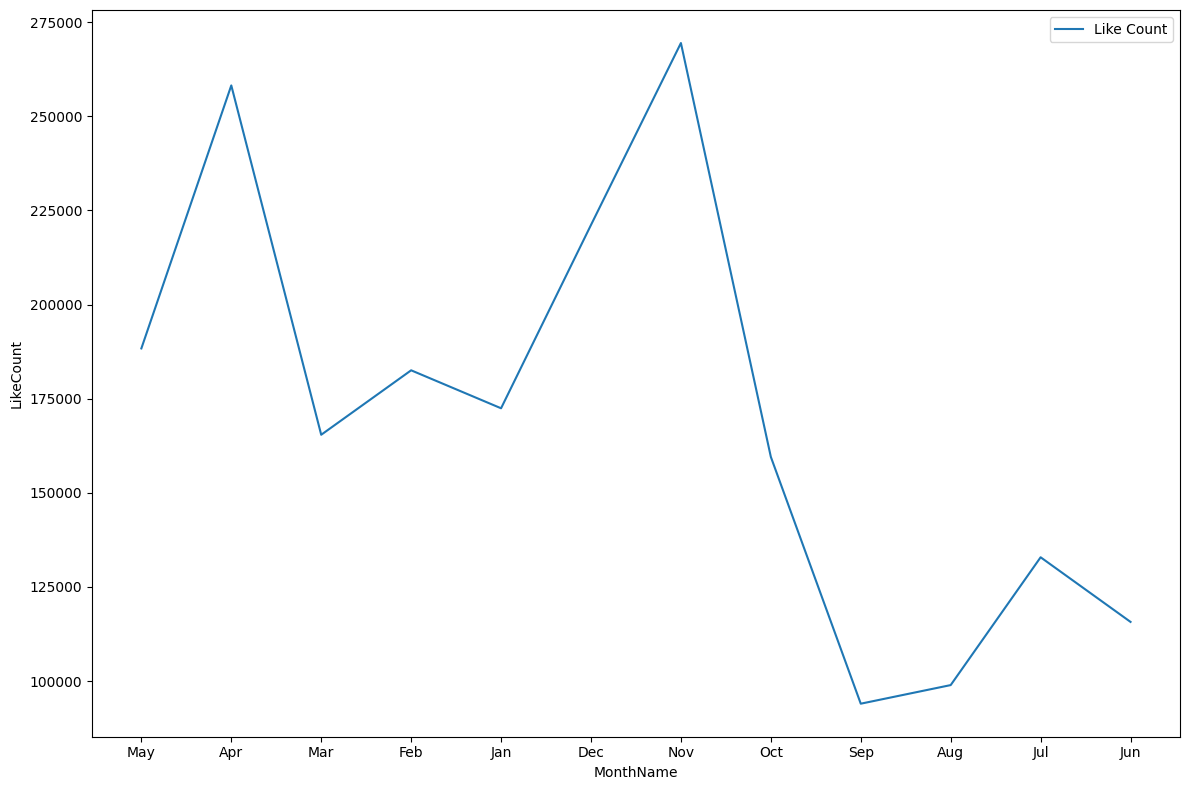

In [13]:
plt.figure(figsize=(12, 8))

sns.lineplot(x='MonthName', y='LikeCount', data=df, label='Like Count', ci=None)
plt.tight_layout()
plt.show()

C:\Users\Karl Jade C. Silva\AppData\Local\Temp\ipykernel_9932\3520089957.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='ReplyCount', data=df[df['Year'] == desired_year], label='Reply Count', ci=None)
C:\Users\Karl Jade C. Silva\AppData\Local\Temp\ipykernel_9932\3520089957.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='RetweetCount', data=df[df['Year']== desired_year], label='Retweet Count', ci=None)
C:\Users\Karl Jade C. Silva\AppData\Local\Temp\ipykernel_9932\3520089957.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='QuoteCount', data=df[df['Year']== desired_year], label='Quote Count', ci=None)


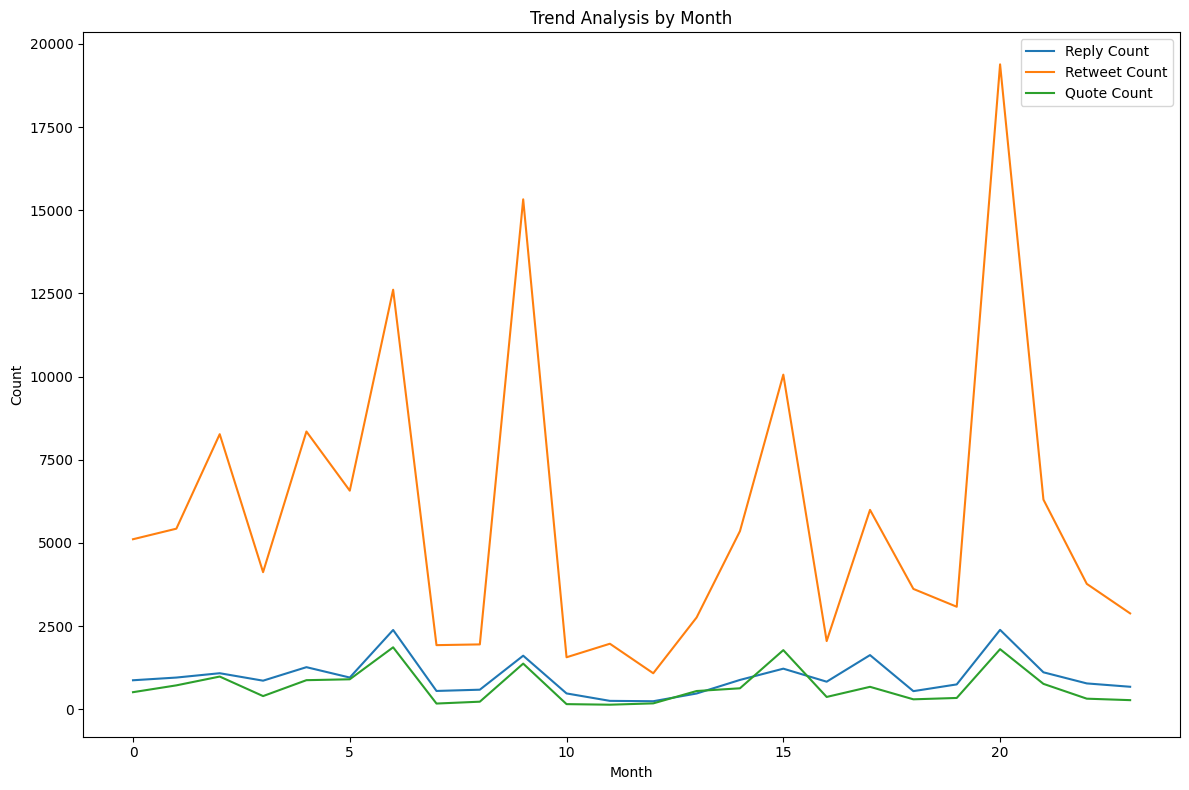

In [14]:
desired_year = 2017 #You can specify year here. In this case, I chose 2017 only. 

plt.figure(figsize=(12, 8))

sns.lineplot(x='Hour', y='ReplyCount', data=df[df['Year'] == desired_year], label='Reply Count', ci=None)
sns.lineplot(x='Hour', y='RetweetCount', data=df[df['Year']== desired_year], label='Retweet Count', ci=None)
sns.lineplot(x='Hour', y='QuoteCount', data=df[df['Year']== desired_year], label='Quote Count', ci=None)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Trend Analysis by Month')
plt.legend()

plt.tight_layout()
plt.show()